In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 로드
rentals = pd.read_csv('일별따릉이.csv')  # 대여량 데이터 포함
temperature = pd.read_csv('기온강수량미세먼지2.csv', encoding='cp949')  # 기온 데이터 포함

# 날짜 형식이 같은지 확인하고 필요하면 통일시키기
rentals['기준_날짜'] = pd.to_datetime(rentals['기준_날짜'])
temperature['기준_날짜'] = pd.to_datetime(temperature['기준_날짜'])

# 데이터 병합
data = pd.merge(rentals, temperature, on='기준_날짜', how='inner')

상관계수: 0.3100369581436954


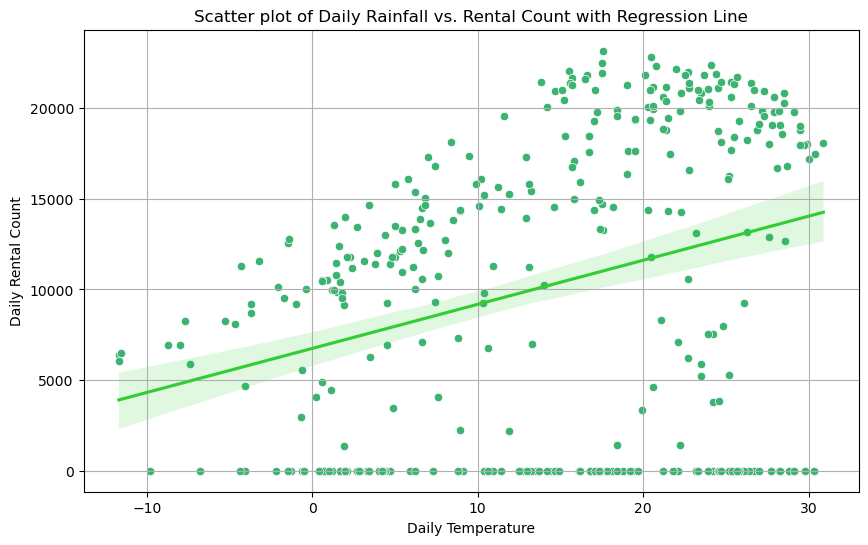

In [4]:
correlation = data['평균기온(°C)'].corr(data['전체_건수'])
print("상관계수:", correlation)

# 상관관계 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='평균기온(°C)', y='전체_건수', data=data, color='mediumseagreen')  # 점 색상을 초록색으로 설정
sns.regplot(x='평균기온(°C)', y='전체_건수', data=data, scatter=False, color='limegreen')
plt.title('Scatter plot of Daily Rainfall vs. Rental Count with Regression Line')
plt.xlabel('Daily Temperature')  # 레이블을 수정해야 할 수도 있습니다. ('Daily Rainfall (mm)'는 아마도 'Average Temperature (°C)'가 되어야 할 것입니다.)
plt.ylabel('Daily Rental Count')
plt.grid(True)
plt.show()


In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.findSystemFonts(fontpaths=None, fontext='ttf')
path = 'C:\\Windows\\Fonts\\malgunbd.ttf'  
fontprop = fm.FontProperties(fname=path, size=12)

# Matplotlib의 기본 폰트 설정 변경
plt.rc('font', family=fontprop.get_name())

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


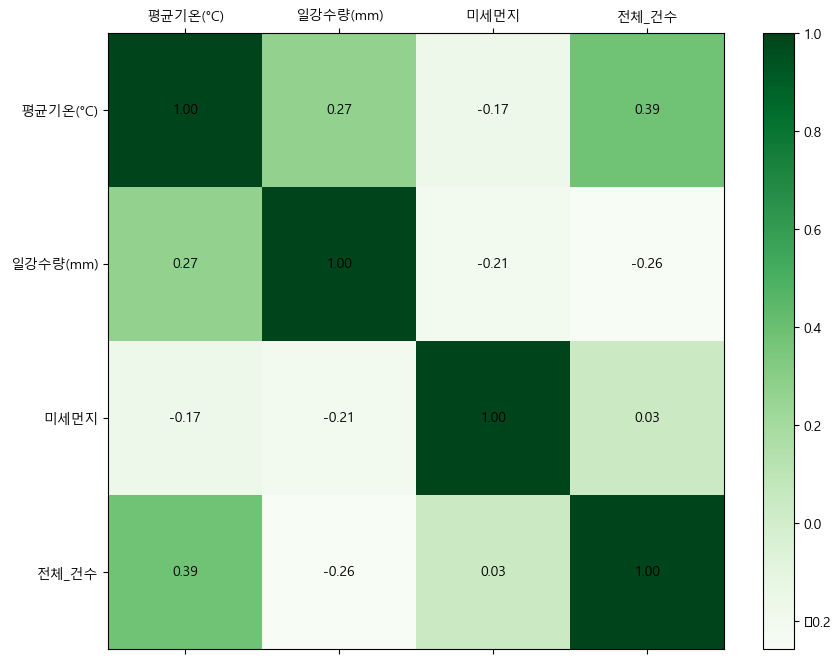

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드 및 날짜 열을 datetime 형식으로 변환
data = pd.read_csv('./합체한따릉이.csv', encoding='cp949')
data['기준_날짜'] = pd.to_datetime(data['기준_날짜'])

# 결측치 제거
data = data.dropna()

# 필요한 데이터만 선택하고 상관계수 계산
corr_matrix = data[['평균기온(°C)', '일강수량(mm)', '미세먼지', '전체_건수']].corr()

# 히트맵 그리기
fig, ax = plt.subplots(figsize=(10, 8))  # 플롯 크기 설정
cax = ax.matshow(corr_matrix, cmap='Greens')  # 상관계수 매트릭스에 히트맵 적용
fig.colorbar(cax)  # 컬러바 추가

# 축 설정
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.index)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.index)

# 각 셀에 상관계수 값 추가
for (i, j), val in np.ndenumerate(corr_matrix):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')  # 연두색 배경에는 검은색 글씨가 더 잘 보일 수 있습니다.

plt.show()

In [7]:
import pandas as pd

files = ['./4-7.csv', './data_past_day.csv']
encodings = ['utf-8', 'latin1', 'iso-8859-1', 'windows-1252']  # 시도할 인코딩 목록

dataframes = []

for file in files:
    for encoding in encodings:
        try:
            df = pd.read_csv(file, encoding=encoding)
            dataframes.append(df)
            print(f"{file} 파일은 {encoding}으로 성공적으로 읽혔습니다.")
            break
        except UnicodeDecodeError:
            print(f"{file} 파일을 {encoding}으로 읽는데 실패했습니다.")
            continue

# 모든 데이터프레임을 하나로 합치기
if dataframes:
    merged_df = pd.concat(dataframes, ignore_index=True)
    # 결과를 새로운 CSV 파일로 저장
    merged_df.to_csv('merged_file.csv', index=False, encoding='utf-8')
else:
    print("파일을 읽을 수 있는 인코딩을 찾지 못했습니다.")

./4-7.csv 파일을 utf-8으로 읽는데 실패했습니다.
./4-7.csv 파일은 latin1으로 성공적으로 읽혔습니다.
./data_past_day.csv 파일을 utf-8으로 읽는데 실패했습니다.
./data_past_day.csv 파일은 latin1으로 성공적으로 읽혔습니다.


In [10]:
import pandas as pd

# 파일 경로
weather_path = './4-3미세먼지.csv'  # 기온과 강수량 데이터
pollution_path = './기온강수량.csv'  # 미세먼지 데이터

# 파일 읽기, 날짜 컬럼을 datetime으로 파싱
weather_data = pd.read_csv(weather_path, encoding='cp949', parse_dates=['기준_날짜'])
pollution_data = pd.read_csv(pollution_path, encoding='cp949', parse_dates=['기준_날짜'])

# 날짜 컬럼을 기준으로 두 데이터프레임 병합, how='inner'는 두 데이터 세트 모두에 날짜가 있는 경우만 병합
combined_data = pd.merge(weather_data, pollution_data, on='기준_날짜', how='inner')

# 병합된 데이터를 새로운 CSV 파일로 저장
combined_data.to_csv('./기온강수량미세먼지2.csv', index=False, encoding='utf-8')